In [95]:
import pandas as pd
from collections import defaultdict
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df_raw_interactions = pd.read_csv("datasets/RAW_interactions.csv")
df_raw_recipes = pd.read_csv("datasets/RAW_recipes.csv")
df_pp_users = pd.read_csv("datasets/PP_users.csv")
df_pp_recipes = pd.read_csv("datasets/PP_recipes.csv")
df_train = pd.read_csv("datasets/interactions_train.csv")
df_test = pd.read_csv("datasets/interactions_test.csv")
df_val = pd.read_csv("datasets/interactions_validation.csv")
df_ingr_map = pd.read_csv("datasets/ingr_map.csv")

In [3]:
def convToMap(data, value_cols):
    if isinstance(value_cols, str):
        value_cols = [value_cols]

    for col in ['id'] + value_cols:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in the DataFrame.")
    
    if(len(value_cols) == 1):
        value_map_1 = defaultdict(set)
        for _, row in data.iterrows():
            value_map_1[row['id']].add(row[value_cols[0]])
        return value_map_1
    else:
        value_map_mult = defaultdict(list)
        for _, row in data.iterrows():
            for col in value_cols:
                value_map_mult[row['id']].append(row[col])
        return value_map_mult

In [23]:
# Cleaning raw recipe to remove recipes that take longer than 1 day, have more than 25 steps, and more than 40 ingredients
df_rr_clean = df_raw_recipes[df_raw_recipes['minutes'] <= 1440]
df_rr_clean = df_rr_clean[df_rr_clean['n_ingredients'] <= 25]
df_rr_clean = df_rr_clean[df_rr_clean['n_steps'] <= 40]



In [24]:
# Mapping ids to ingrediants and recipes for future reference
id_to_ingr = convToMap(df_ingr_map, "replaced")
id_to_recipe = convToMap(df_rr_clean, ["name","minutes", "nutrition", "n_steps", "ingredients", "n_ingredients"])

In [25]:
# Dropping date, u, and i columns
df_train_clean = df_train.drop(["date", "u", "i"], axis=1)
df_test_clean = df_test.drop(["date", "u", "i"], axis=1)
df_val_clean = df_val.drop(["date", "u", "i"], axis=1)

# Removing any recipes that were removed from cleaning the raw recipes
df_train_clean = df_train_clean[df_train_clean['recipe_id'].isin(df_rr_clean['id'])]
df_test_clean = df_test_clean[df_test_clean['recipe_id'].isin(df_rr_clean['id'])]
df_val_clean = df_val_clean[df_val_clean['recipe_id'].isin(df_rr_clean['id'])]

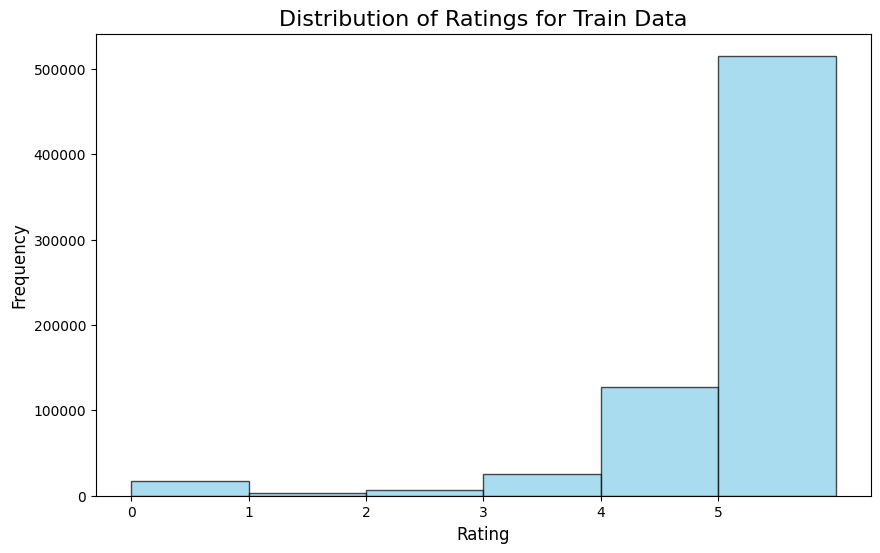

In [7]:
plt.figure(figsize=(10, 6))
bin_edges = range(0, 7)
plt.hist(df_train_clean['rating'], bins=bin_edges, edgecolor='black', color='skyblue', alpha=0.7)

# Adding titles and labels
plt.title('Distribution of Ratings for Train Data', fontsize=16)
plt.xticks(range(0, 6))
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Show the plot
plt.show()

In [8]:
df_train_clean['rating'].mean()

np.float64(4.574060879290764)

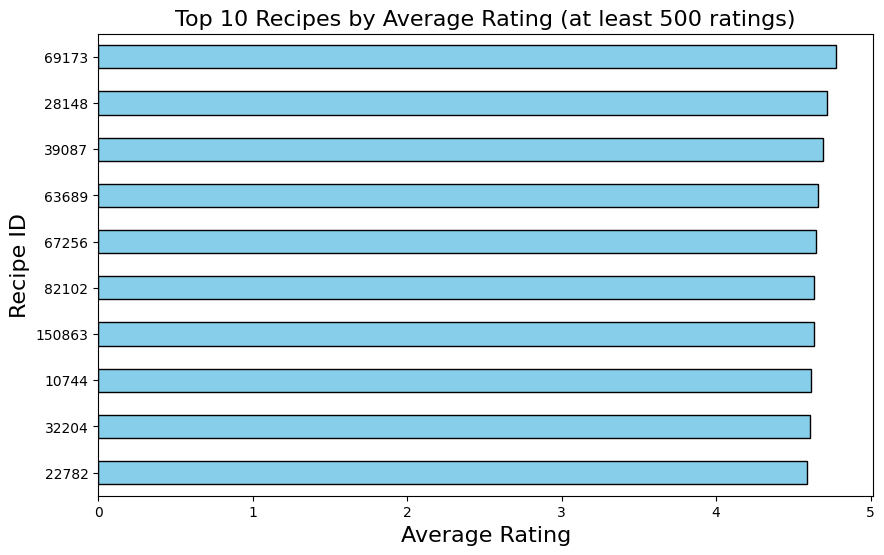

In [9]:
recipe_rating_counts = df_train_clean.groupby("recipe_id").size()

# Filter recipes that have at least `min_ratings` ratings
eligible_recipes = recipe_rating_counts[recipe_rating_counts >= 500].index

# Filter the data to include only eligible recipes
filtered_data = df_train_clean[df_train_clean["recipe_id"].isin(eligible_recipes)]

# Calculate the average rating for each recipe
recipe_avg_ratings = filtered_data.groupby("recipe_id")["rating"].mean()

# Sort the recipes by average rating in descending order and get the top 10
top_10_recipes = recipe_avg_ratings.sort_values(ascending=False).head(10)

# Plotting the top 10 recipes by rating
plt.figure(figsize=(10, 6))
top_10_recipes.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title(f'Top 10 Recipes by Average Rating (at least {500} ratings)', fontsize=16)
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('Recipe ID', fontsize=16)

# Show the plot
plt.gca().invert_yaxis() 
plt.show()

In [10]:
i = 1
for id in top_10_recipes.index:
    print("Rank " + str(i) + ": " + str(id_to_recipe[id][0]))
    i+=1

Rank 1: kittencal s italian melt in your mouth meatballs
Rank 2: oven fried chicken chimichangas
Rank 3: creamy cajun chicken pasta
Rank 4: my family s favorite sloppy joes  pizza joes
Rank 5: best ever banana cake with cream cheese frosting
Rank 6: kittencal s moist cheddar garlic oven fried chicken breast
Rank 7: panera s cream cheese potato soup
Rank 8: delicious chicken pot pie
Rank 9: whatever floats your boat  brownies
Rank 10: jo mama s world famous spaghetti


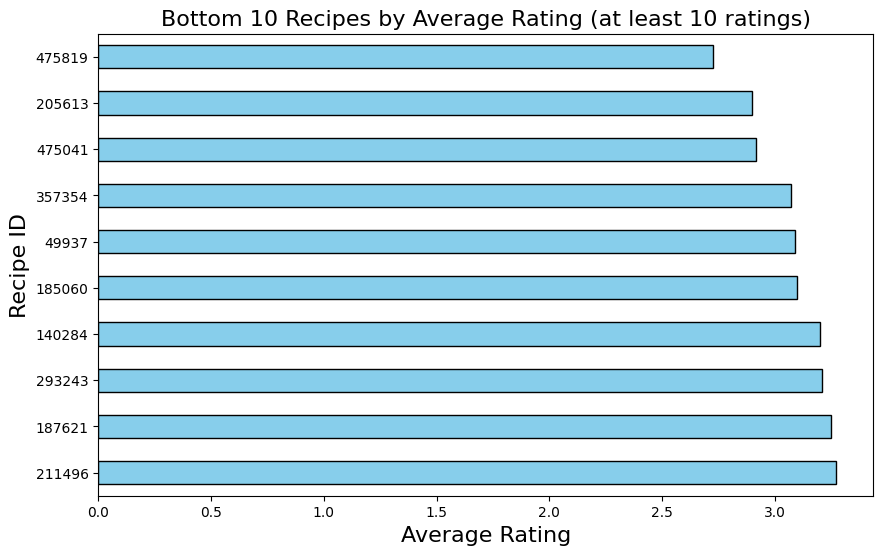

In [11]:
recipe_rating_counts = df_train_clean.groupby("recipe_id").size()

# Filter recipes that have at least `min_ratings` ratings
eligible_recipes = recipe_rating_counts[recipe_rating_counts >= 10].index

# Filter the data to include only eligible recipes
filtered_data = df_train_clean[df_train_clean["recipe_id"].isin(eligible_recipes)]

# Calculate the average rating for each recipe
recipe_avg_ratings = filtered_data.groupby("recipe_id")["rating"].mean()

# Sort the recipes by average rating in descending order and get the bottom 10
bot_10_recipes = recipe_avg_ratings.sort_values(ascending=True).head(10)

# Plotting the bottom 10 recipes by rating
plt.figure(figsize=(10, 6))
bot_10_recipes.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title(f'Bottom 10 Recipes by Average Rating (at least {10} ratings)', fontsize=16)
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('Recipe ID', fontsize=16)

# Show the plot
plt.gca().invert_yaxis() 
plt.show()

In [12]:
i = 1
for id in bot_10_recipes.index:
    print("Rank " + str(i) + ": " + str(id_to_recipe[id][0]))
    i+=1

Rank 1: breakfast tex mex haystacks
Rank 2: frozen banana popsicles
Rank 3: bacon   goat cheese potatoes with sundried tomato sour cream
Rank 4: chocolate  mug cake
Rank 5: banana oatmeal bars
Rank 6: spicy pork enchiladas with mole sauce
Rank 7: monster toes  for halloween
Rank 8: quick cinnamon rolls   no yeast
Rank 9: bruschetta chicken bake   weight watchers
Rank 10: special beef breakfast sausage


In [ ]:
'''
def createNegativeData(data):
    all_users = data['user_id'].unique()
    all_recipes = range(100, 110)  # Assume recipe IDs are in this range for the example

    # Create a set of existing user-recipe pairs
    existing_pairs = set(zip(data['user_id'], data['recipe_id']))
    num_negative_samples = len(data) 

    negative_samples = []
    while len(negative_samples) < num_negative_samples:
        user = np.random.choice(all_users)
        recipe = np.random.choice(all_recipes)
        if (user, recipe) not in existing_pairs:  # Ensure the pair doesn't already exist
            negative_samples.append((user, recipe, False))

    # Convert negative samples to a DataFrame
    negative_data = pd.DataFrame(negative_samples, columns=['user_id', 'recipe_id', 'made'])
     
    # Combine positive and negative data
    balanced_data = pd.concat([data, negative_data], ignore_index=True)

    return balanced_data
'''

In [ ]:
'''
df_train_recc = df_train_clean.drop(["rating"], axis=1)
df_train_recc['made'] = True

df_test_recc = df_test_clean.drop(["rating"], axis=1)
df_test_recc['made'] = True

df_val_recc = df_val_clean.drop(["rating"], axis=1)
df_val_recc['made'] = True

createNegativeData(df_train_recc).to_csv("recipes_made_train.csv", index=False)
createNegativeData(df_test_recc).to_csv("recipes_made_test.csv", index=False)
createNegativeData(df_val_recc).to_csv("recipes_made_val.csv", index=False)
'''

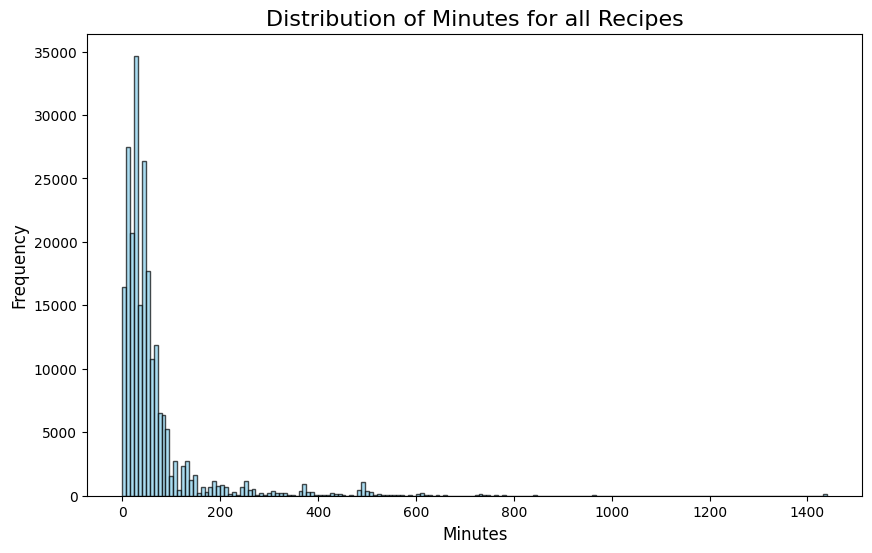

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df_rr_clean['minutes'], bins=180, edgecolor='black', color='skyblue', alpha=0.7)

# Adding titles and labels
plt.title('Distribution of Minutes for all Recipes', fontsize=16)
plt.xlabel('Minutes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Show the plot
plt.show()

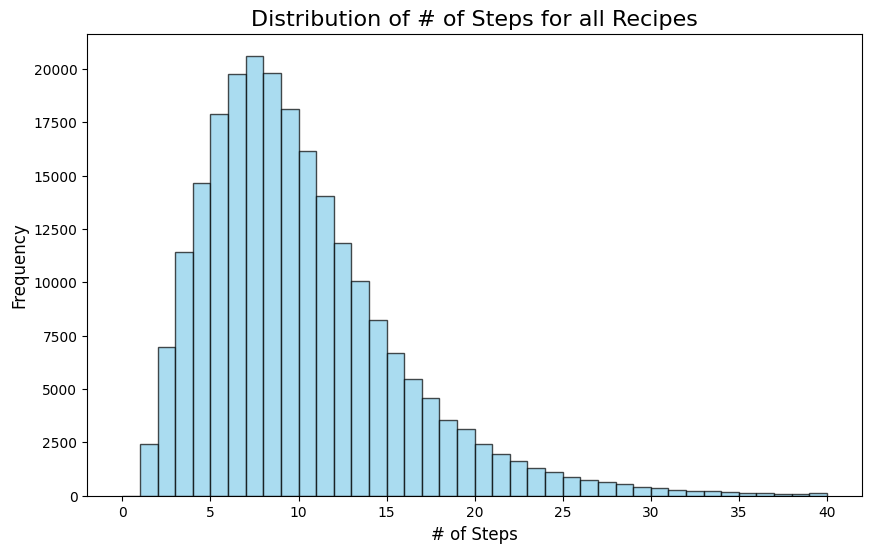

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df_rr_clean['n_steps'], bins=40, edgecolor='black', color='skyblue', alpha=0.7)

# Adding titles and labels
plt.title('Distribution of # of Steps for all Recipes', fontsize=16)
plt.xlabel('# of Steps', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Show the plot
plt.show()

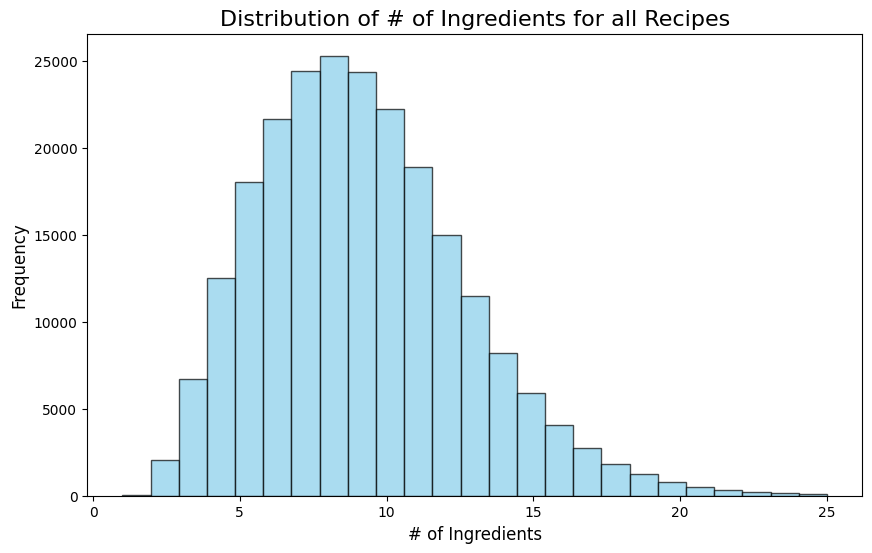

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df_rr_clean['n_ingredients'], bins=25, edgecolor='black', color='skyblue', alpha=0.7)

# Adding titles and labels
plt.title('Distribution of # of Ingredients for all Recipes', fontsize=16)
plt.xlabel('# of Ingredients', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Show the plot
plt.show()